# Gold recovery prediction model 

We will prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model will predict the amount of gold recovered from gold ore. We have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.
We will:

Prepare the data;
Perform data analysis;
Develop and train a model.

**Project goal:** Prepare a prototype of a machine learning model, to predict gold recovery, with the lowest weighted sMAPE error metric. 

## Load and prepare the data

### Open the files and look into the data.

In [1]:
# Loading libraries
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
# pd.options.display.float_format = '{:.3f}'.format

In [2]:
# load the data into DataFrames: 
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


The data includes 3 datasets:

1. train: 87 columns, 16860 entries.
2. test: 53 columns (without output features, see below in details), 5856 entries.
3. full(source): 87 columns, 22716 entries (includes both the upper datasets together, with all the features).

The 2 values of high interest for us are: 1. The gold concentrate recovery after the flotation stage (rougher.output.recovery, column 48 in train and full datasets), and 2. The gold concentrate final recovery after the 2 purification stages (final.output.recovery, column 5 in train and full datasets). 

There are some missing values, that will be dealt with below, in pre-processing. Most datatypes are ok (float), but the identifier of each entry ('date') is object dtype, and should be transformed into 'datetime' datatype. 


### Check that recovery is calculated correctly. 

Using the training set, we will calculate recovery for the rougher.output.recovery feature. we will find the MAE between our calculations and the feature values, and provide the findings.

In [9]:
# First we will look at the 'rougher.output.recovery' values in the train set: 
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [10]:
# Now we will choose only the columns needed for the rougher.output.recovery calculation check,
    # and drop data with missing values on these 4 columns - to make the check reliable: 
train_1 = train[['rougher.output.concentrate_au',
               'rougher.input.feed_au',
               'rougher.output.tail_au',
               'rougher.output.recovery']]
train_1 = train_1.dropna()
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14287 non-null  float64
 1   rougher.input.feed_au          14287 non-null  float64
 2   rougher.output.tail_au         14287 non-null  float64
 3   rougher.output.recovery        14287 non-null  float64
dtypes: float64(4)
memory usage: 558.1 KB


In [11]:
# Check the MAE between the calculation and the revovery feature in the train data: 
from sklearn.metrics import mean_absolute_error

C = train_1['rougher.output.concentrate_au']
F = train_1['rougher.input.feed_au']
T = train_1['rougher.output.tail_au']
RF = train_1['rougher.output.recovery']
train_1['calculated_recovery'] = (C * (F - T))/(F * (C - T)) * 100 
mae = mean_absolute_error(train_1['calculated_recovery'], RF)
mae 

9.303415616264301e-15

We can see the MAE is very small, so probably the recovery feature in the data was caculated correctly. We will later see what about missing values that are relevant fo this value. 

### Analyze the features not available in the test set. 

What are these parameters? What is their type?


In [12]:
# Look at all the columns that are in train set but not in test set: 
train.columns.drop(test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

We can see that all 'output' and 'calculation' features are not available in the test set. Let's see it is really all of them: 

In [13]:
# Count the columns missing from test set:
len(train.columns.drop(test.columns))

34

34 is exactly 87 (columns in train and full sets) minus 53 (columns in test set). Let's see now, for one example, that the full dataset has the missing data on the test set entries: 

In [14]:
# As an example, checking the first row of the test set - in the full set (to see it has the target columns): 
full.query('date == "2016-09-01 00:59:59"')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


The numbers show it is the exact same entry as in the test set, just with all the 'output' and 'calculation' columns.

### Perform data preprocessing.

#### Datatypes

In [15]:
# change 'date' datatype into 'datetime' in all three datasets: 
train['date']= pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date']= pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
full['date']= pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
print(train['date'].dtype)
print(test['date'].dtype)
print(full['date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Gold concentration feed - above zero 

In [16]:
# First for train set - we will check if all entries have any gold in their feed (and don't have negative values)
train['rougher.input.feed_au'].min()

0.0

No negative values, but zero exists. These will obviously yield no gold concentrate later in the process as well. How many of them exist in the data? 

In [17]:
# Check entries that have no gold in the feed:
train[train['rougher.input.feed_au'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
101,2016-01-19 05:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.943929,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819
102,2016-01-19 06:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,14.040873,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057
103,2016-01-19 07:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.972371,-799.600085,12.021058,-641.457227,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,2018-01-30 03:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,20.005303,-500.893527,14.922286,-500.230461,10.909829,-500.314837,9.007956,-500.153163,10.988968,-500.387261
12053,2018-01-30 04:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,19.962859,-655.489381,14.956567,-524.758657,10.961487,-500.066426,9.004925,-500.040902,10.961121,-500.023096
12054,2018-01-30 05:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,20.017100,-523.801393,15.013965,-499.995375,10.991333,-499.941268,9.062215,-499.992738,10.996987,-499.871678
12055,2018-01-30 06:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,19.947963,-521.792599,15.041185,-500.303435,10.980523,-500.095725,9.041985,-499.916563,11.010581,-500.083532


1159 entries (only in train set) that had zero gold in their feed - worth a note to the company! Let's drop them from our data because they are irrelevant for prediction (it is clear they will yield zero gold concentrate in the end as well) and they create nulls in some important values - like the recovery (as can be seen above). 

In [18]:
# Keep only Train entries with any gold in the feed:
train = train[train['rougher.input.feed_au'] > 0]
len(train)

15618

In [19]:
# Full and Test sets - keep only entries with any gold in the feed:
full = full[full['rougher.input.feed_au'] > 0]
test = test[test['rougher.input.feed_au'] > 0]
len(test)

5471

In addition to the 1159 entries with zero gold in the feed, there were additional 385 entries (in the test set) of zero gold in the feed. We droped them too from the data. They are worth a note though - 1544 entries altogether with zero gold concentration in the feed.  

#### Missing values

In [20]:
# Check missing values in train set - columns with more than 500 missing values (which are about 3% of data in the column now)
train.isnull().sum()[train.isnull().sum() > 500] 

primary_cleaner.output.concentrate_sol     510
rougher.input.floatbank11_xanthate         814
rougher.output.recovery                   1331
rougher.output.tail_ag                    1072
rougher.output.tail_sol                   1071
rougher.output.tail_au                    1071
rougher.state.floatbank10_e_air            539
secondary_cleaner.output.tail_sol         1874
dtype: int64

Two interesting points:

1. Only one column ('secondary_cleaner.output.tail_sol') has more than 10% missing values, and it is an output (not needed for prediction), and not needed for 'recovery' (our target) calculations. We will drop this column (without losing any full entry). 
2. 'rougher.output.recovery' has more missing values than the columns needed to claculate it, of which the one with the highest number of missing values is 'rougher.output.tail_au', with only 1071 missing values. This means that if we calculate rougher recovery we might be able to add 260 correct rougher recovery values (that are now missing). We will do it for 'final recovery' as well, for both datasets with outputs: train and full.
In order to make sure we don't get inf in any of the recovery values - we need to make sure the F in each formula is not zero. for 'rougher.output.recovery' calculation - the F is 'rougher.input.feed_au', and we already dropped all the zeros there. For 'final.output.recovery' calculation - the F is 'rougher.output.concentrate_au' - so we will also drop any remaining data where this value is zero 

In [21]:
# dropping the column with the highest number of missing values from train and full datasets
train = train.drop(['secondary_cleaner.output.tail_sol'], axis=1)
full = full.drop(['secondary_cleaner.output.tail_sol'], axis=1)

In [22]:
# drop any data where 'rougher.output.concentrate_au' is zero (to avoid inf in the final.recovery calculation):
train = train[train['rougher.output.concentrate_au'] > 0]
full = full[full['rougher.output.concentrate_au'] > 0]
len(train)

15241

We can see that almost 400 additional entries (15618 - 15241) in train set had zero gold after the floatation - and we have to remove these as they would make inf final_recovery value.   

In [26]:
# replacing the recovery values in train and full datasets with a calculation (adding correct recovery values to the data)
    # and checking all columns in train set now with more than 100 missing values:
data = [train, full]
for df in data:
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    df['rougher.output.recovery'] = (C * (F - T))/(F * (C - T)) * 100 

    C = df['final.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['final.output.tail_au']
    df['final.output.recovery'] = (C * (F - T))/(F * (C - T)) * 100 

train.isnull().sum()[train.isnull().sum() > 100] 

final.output.concentrate_sol                 302
final.output.tail_pb                         120
primary_cleaner.input.sulfate                402
primary_cleaner.input.depressant             276
primary_cleaner.input.xanthate               297
primary_cleaner.output.concentrate_pb        221
primary_cleaner.output.concentrate_sol       483
primary_cleaner.output.tail_sol              171
rougher.input.feed_pb                        139
rougher.input.feed_rate                      223
rougher.input.feed_size                      157
rougher.input.feed_sol                       179
rougher.input.floatbank10_sulfate            389
rougher.input.floatbank11_sulfate            369
rougher.input.floatbank11_xanthate           778
rougher.output.recovery                     1014
rougher.output.tail_ag                      1015
rougher.output.tail_sol                     1014
rougher.output.tail_au                      1014
rougher.state.floatbank10_e_air              466
secondary_cleaner.st

We can see that now 'rougher.output.recovery' has now only 1014 missing values, just like 'rougher.output.tail_au' (without which you cannot calculate the rougher recovery).

We will consider now - prioritizing reliability of our analysis and model - droping all remaining train data with missing values. Let's first see what portion of our current data will it drop:

In [27]:
# Checking size of train data if we drop all remaining data with missing values: 
len(train.dropna())

12224

Since after we dropped the irrelevant 'zero gold' entries, we had 15241 entries in train data, if we drop the remaining data with missing values (and keep reliable data) - we drop a bit less than 20%, but keep more than 80%, and with more than 12K entries. This seems like our best choice, enough for anlysis and model development, and justifiable. 

In [28]:
# Drop the train data with missing values: 
train = train.dropna()

Before we conmplete missing-values-handling for the test set too - we need to add to the test set the 2 target values, that needs to be predicted: rougher recovery and final recovery.

#### Add target to test dataset

In [29]:
# Add the 2 target values that need to be predicted from full set to test set:
test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 0 to 5470
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5471 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5457 non-null   float64       
 2   primary_cleaner.input.depressant            5454 non-null   float64       
 3   primary_cleaner.input.feed_size             5471 non-null   float64       
 4   primary_cleaner.input.xanthate              5457 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5471 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5471 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5471 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5471 non-null   float64       
 9   primary_

The 2 target columns were added to the test set. Now we will check for missing values in the test set. 

In [30]:
# Test set - check missing values: 
test.isnull().sum()[test.isnull().sum() > 0] 

primary_cleaner.input.sulfate                14
primary_cleaner.input.depressant             17
primary_cleaner.input.xanthate               14
rougher.input.feed_rate                       7
rougher.input.feed_size                       1
rougher.input.feed_sol                       51
rougher.input.floatbank10_sulfate            11
rougher.input.floatbank10_xanthate            3
rougher.input.floatbank11_sulfate            11
rougher.input.floatbank11_xanthate           42
secondary_cleaner.state.floatbank2_a_air      3
secondary_cleaner.state.floatbank2_b_air      5
secondary_cleaner.state.floatbank3_a_air     13
rougher.output.recovery                     225
final.output.recovery                       132
dtype: int64

Numbers of missing values are not high. We remember that some missing recovery values were already filled above (in the full set, before the merge) with any recovery calculation that could be done with the existing data on these entries). Let us check what portion of the current test set we will lose if we drop all remaining data with missing values:

In [31]:
# Check the length of no-missing-values data that will remain in test set:
len(test.dropna())

5173

Out of the 5471 entries, keeping 5173 means dropping only less than 5.5% of the entries, so it seems ok and justifiable. 

In [32]:
# Drpping from test set all data with missing values:
test = test.dropna()

We have now 2 datasets ready for analysis and model development & testing, without any missing values and without cases of zero gold in the feed: Train set, and Test set. 

Our last correction will be to drop all rows with faulty values for the recovery - negative or above 100(%), only checking first if we see clear reasons for such values: 

In [33]:

train[train['rougher.output.recovery'] > 100][['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                              'rougher.output.tail_au', 'rougher.output.recovery']]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
53,3.507147,7.548341,2.187465,188.742102
835,5.966380,11.209605,1.359009,113.796771
837,8.347044,11.484935,1.521192,106.088867
2072,6.544348,7.069204,3.504448,108.559127
2362,3.277688,10.113163,1.845347,187.078988
...,...,...,...,...
16525,10.169620,10.484898,1.544372,100.538404
16647,10.133832,10.404188,1.595380,100.485526
16653,1.522571,10.556043,1.501984,6343.566718
16697,6.038533,11.035269,1.343570,112.957805


In [34]:
train = train[train['rougher.output.recovery'] <= 100]
train = train[train['rougher.output.recovery'] > 0]
train = train[train['final.output.recovery'] <= 100]
train = train[train['final.output.recovery'] > 0]
test = test[test['rougher.output.recovery'] <= 100]
test = test[test['rougher.output.recovery'] > 0]
test = test[test['final.output.recovery'] <= 100]
test = test[test['final.output.recovery'] > 0]
print('train has now', len(train), 'rows')
print('test has now', len(test), 'rows')

train has now 12009 rows
test has now 5105 rows


## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.



In [35]:
# All columns_names that are containing the substring 'au' (Gold): 
train.loc[:,['au' in i for i in train.columns]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12009 entries, 0 to 16859
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_au                         12009 non-null  float64
 1   final.output.tail_au                                12009 non-null  float64
 2   primary_cleaner.output.concentrate_au               12009 non-null  float64
 3   primary_cleaner.output.tail_au                      12009 non-null  float64
 4   rougher.calculation.sulfate_to_au_concentrate       12009 non-null  float64
 5   rougher.calculation.floatbank10_sulfate_to_au_feed  12009 non-null  float64
 6   rougher.calculation.floatbank11_sulfate_to_au_feed  12009 non-null  float64
 7   rougher.calculation.au_pb_ratio                     12009 non-null  float64
 8   rougher.input.feed_au                               12009 non-null  float64


In [36]:
# Look at a sample of the gold concentration changes in the main product:
au_main = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
au_main.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


In this sampe, we can see the gold concentration rise from ~6 (feed) to ~20 (rougher, after floatation), then to around 30 or more (after primary cleaner) and eventually to more than 40 (final output, after the secondary cleaner). From this sample we will move to looking at the whole distribution of gold concentrations in the different stages. 


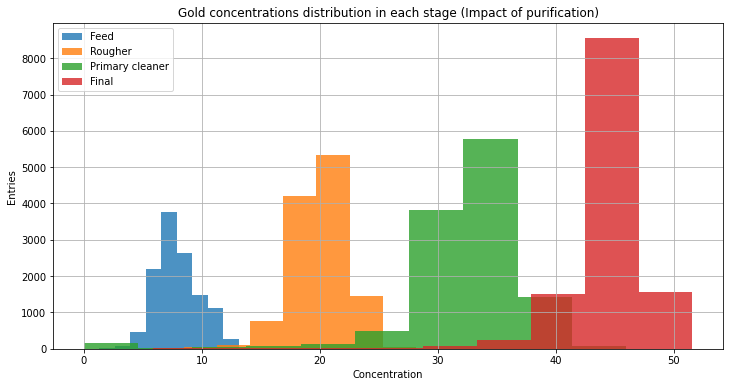

In [37]:
# Histograms of gold concentration distribution in each stage: 
plt.figure(figsize=(12, 6))
train['rougher.input.feed_au'].hist(grid=True, alpha=0.8)
train['rougher.output.concentrate_au'].hist(alpha=0.8) 
train['primary_cleaner.output.concentrate_au'].hist(alpha=0.8)
train['final.output.concentrate_au'].hist(alpha=0.8)
plt.title('Gold concentrations distribution in each stage (Impact of purification)')
plt.xlabel('Concentration')
plt.ylabel('Entries')
plt.legend(['Feed', 'Rougher', 'Primary cleaner', 'Final'])
plt.show;

We can see that as the stages progress, not only the gold concentration values increase, but also these values' distribution becomes more and more concentrated on the higher values, and more and more left-skewed. In the final output, around 90% of all entries have gold concentrations in the top 20% of gold concentration values range.  

Before we move to the other metals, let's look at a sample of how the gold condentration in the tail (residue) changes too, as it is also influencing recovery calculations (although these numbers are far less important than the main 'final.output'). 

In [38]:
# Gold concentration in the tail (residue):
au_tail = train[['rougher.input.feed_au', 'rougher.output.tail_au', 
           'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au', 'final.output.tail_au']]
au_tail.head()

,rougher.input.feed_au,rougher.output.tail_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,final.output.tail_au
0,6.486150,1.170244,2.106679,2.606185,2.143149
1,6.478583,1.184827,2.353017,2.488248,2.224930
2,6.362222,1.162562,2.416800,2.458187,2.257889
3,6.118189,1.079755,2.262051,2.322062,2.146849
4,5.663707,1.012642,2.277073,2.330448,2.055292


In this sample, we can see how all gold concentration in the tail, after all stages, are significantly lower then in the initial input feed. After flotation (rougher) we get a bit more than 1, primary cleaner provides around double (more than 2), secondary cleaner provides higher gold concentration (but far less dramatic then primary cleaner), and the final.output.tail gold concentrate (all tails together) is close to the primary_cleaner.output.tail values.

We will look now at the concentration changes of Silver (ag) and Lead (pb) in the main output. Again (as with gold) we will look, for each metal, first at a sample and then at the whole distribution of that metal concentration in each stage. We will start with Silver:

In [39]:
# Look at a sample of the Silver (ag) concentration changes in the main output:
ag_main = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
ag_main.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


In this sample, we can see the original concentrate of silver in the feed is similar to gold (~6), it almost doubles after flotation (rougher.output, ~12), and then declines in each of the two cleaner stages (in which the gold concentrate rised). The silver concentrate in the final main output is similar to what it was in the original feed. We will look now at the whole ditribution of silver concentration in each stage: 

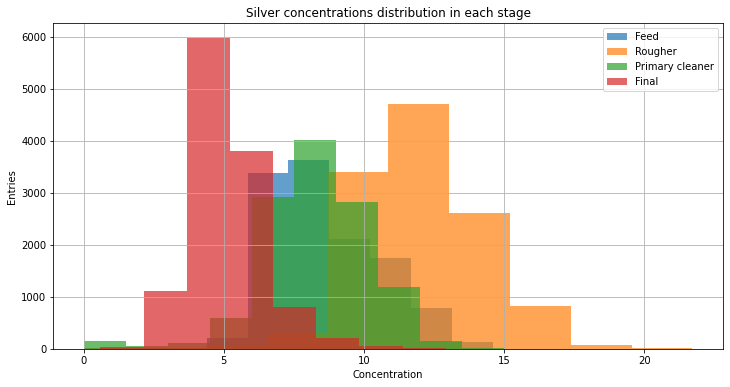

In [40]:
# Histograms of silver concentration distribution in each stage: 
plt.figure(figsize=(12, 6))
train['rougher.input.feed_ag'].hist(grid=True, alpha=0.7)
train['rougher.output.concentrate_ag'].hist(alpha=0.7) 
train['primary_cleaner.output.concentrate_ag'].hist(alpha=0.7)
train['final.output.concentrate_ag'].hist(alpha=0.7)
plt.title('Silver concentrations distribution in each stage')
plt.xlabel('Concentration')
plt.ylabel('Entries')
plt.legend(['Feed', 'Rougher', 'Primary cleaner', 'Final'])
plt.show;

It is noteworthy that as silver concentration values grow from feed to rougher (after floatation) - also the distribution of these values spreads. Later, inversly, as the values of silver concentration declive from rougher to primary_cleaner, and then again to final output - their distribution also becomes more and more condence, and in final output around 90% of all entries have silver concentration condenced only in the 3rd and 4th tenths of the silver concentration values range (which is a right-skewed distribution, as is easy to see in the graph).  

We will move now to Lead (pb):

In [41]:
# Look at a sample of the Lead (pb) concentration changes in the main output:
pb_main = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
pb_main.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


In this sample, we see how the concentration of Lead is around 2 in the feed, tripples after floatation (rougher.output, more than 7), then rises a bit more, to around 9-10, in primary and secondary. We will look now at the whole ditribution of silver concentration in each stage: 

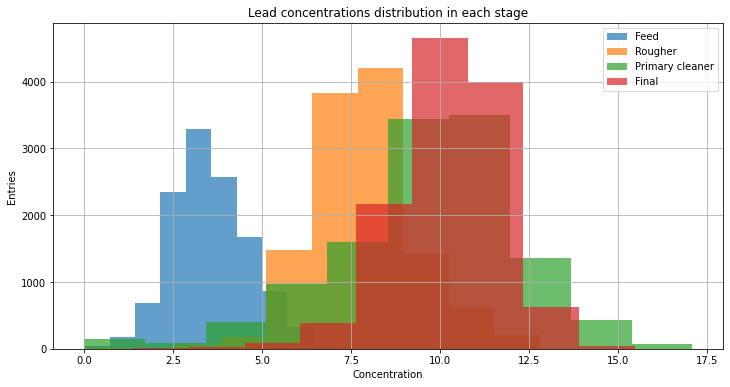

In [42]:
# Histograms of lead concentration distribution in each stage: 
plt.figure(figsize=(12, 6))
train['rougher.input.feed_pb'].hist(grid=True, alpha=0.7)
train['rougher.output.concentrate_pb'].hist(alpha=0.7) 
train['primary_cleaner.output.concentrate_pb'].hist(alpha=0.7)
train['final.output.concentrate_pb'].hist(alpha=0.7)
plt.title('Lead concentrations distribution in each stage')
plt.xlabel('Concentration')
plt.ylabel('Entries')
plt.legend(['Feed', 'Rougher', 'Primary cleaner', 'Final'])
plt.show;

The tripling of lead concentration values, from feed to rougher output, is acompanied by a bit more condence distribution (from over 80% of entries spreading on 4 tenths of the range - to spreading on 2 tenths only). The bext stage (primary cleaner) grows in lead concentration values, but the distribution of these values spreads a little (as is clear in the graph). Moving to the last stage - final - doesn't change the concentraion values that much, but it does change the distribution into more concentrated mainly on only two tenths of the range (and light right-skewed).  

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.



In [43]:
train['rougher.input.feed_size'].describe()

count    12009.000000
mean        58.499111
std         19.533871
min          9.659576
25%         48.891622
50%         54.812543
75%         63.970311
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [44]:
test['rougher.input.feed_size'].describe()

count    5105.000000
mean       55.917371
std        18.997593
min         0.046369
25%        43.906347
50%        51.033226
75%        62.281300
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Distributions of the feed particle size vary between train and test sets, but the differences are not very large: for example the means are only ~5% apart (58.55 vs. 56), and the 3rd quartiles are only less then 3% apart (64.11 vs. 62.38). In the same time - the minimal feed particle size in the train set is around 10, while in test set it is around 0.05. Before we estimate if the distributions differences might intefere with model evaluation - we will look at the whole distribution of feed particle size in each dataset: 

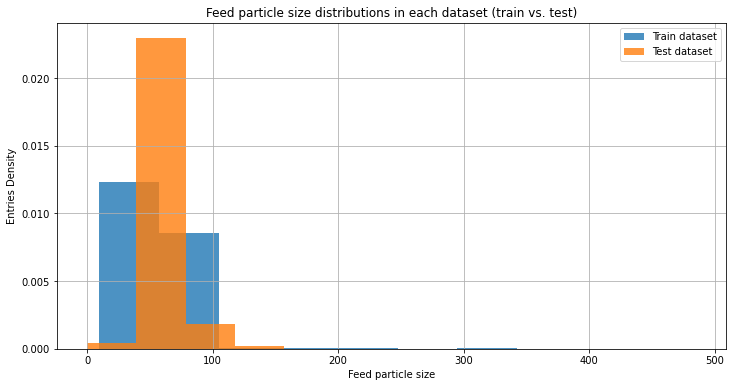

In [45]:
# Histograms of gold concentration distribution in each stage: 
plt.figure(figsize=(12, 6))
train['rougher.input.feed_size'].hist(density=True, grid=True, alpha=0.8)
test['rougher.input.feed_size'].hist(density=True, alpha=0.8) 
plt.title('Feed particle size distributions in each dataset (train vs. test)')
plt.xlabel('Feed particle size')
plt.ylabel('Entries Density')
plt.legend(['Train dataset', 'Test dataset'])
plt.show;

The full distributions seem to confirm that the differences are not large enough to intefere with model evaluation: both distributions are very strongly right-skewed, and having almost all entries concentrated in 1-2 tenths of the whole range of feed particle size values.  

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

A central anomaly in concentrations that was identified above was the zero gold in the feed of 1544 entries in the original data, and a few additional hundreds entries had zero gold concentration after floatation. These anomalies (that prevent calculating recovery values) we dropped above.

Before we check the total metal concentration (all three metals together) in each stage - we will look now at the remaining distributions of each of the 3 metals in the 4 stages: raw feed, rougher concentrate, primary_cleaner and final concentrate, through boxplots. We will check it on the full dataset (containing all the remaining entries of train and test). 

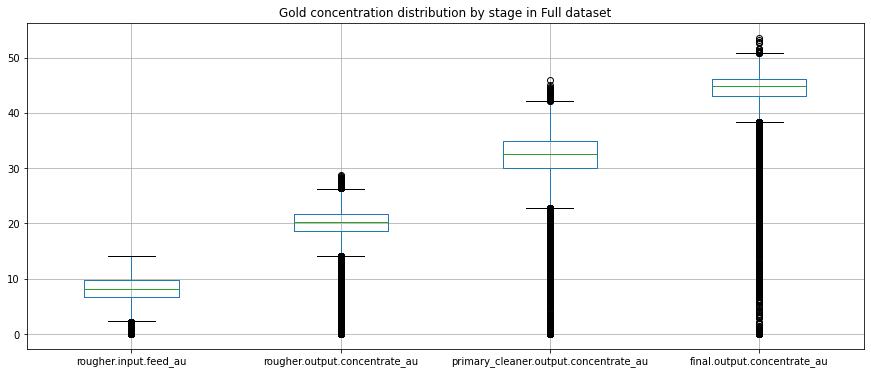

In [46]:
# boxplots of Gold concentration distribution by stage in full dataset:
full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
          'final.output.concentrate_au']].boxplot(figsize=(15, 6))
plt.title("Gold concentration distribution by stage in Full dataset")
plt.show()

Since the boxplot might look as if we have left any zero values - let's re-check:

In [47]:
# checking for zero gold in feed:
full[full['rougher.input.feed_au'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [48]:
# checking for zero gold after floatation:
full[full['rougher.output.concentrate_au'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


No. no zeros in gold feed left. Let's continue to the other materials: 

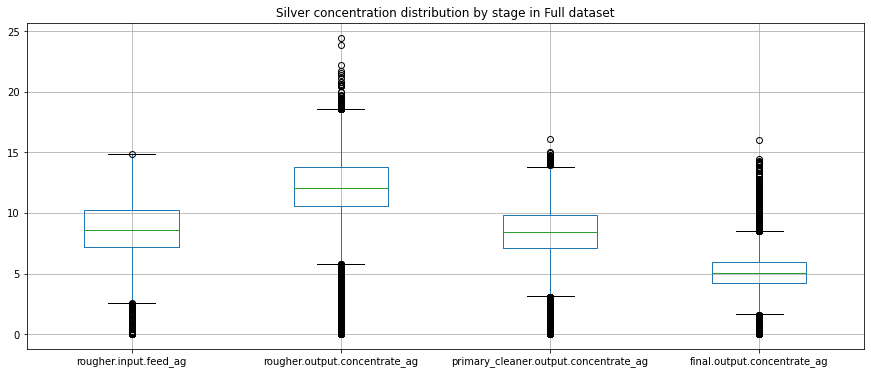

In [49]:
# boxplots of Silver concentration distribution by stage in full dataset:
full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',  
          'final.output.concentrate_ag']].boxplot(figsize=(15, 6))
plt.title("Silver concentration distribution by stage in Full dataset")
plt.show()

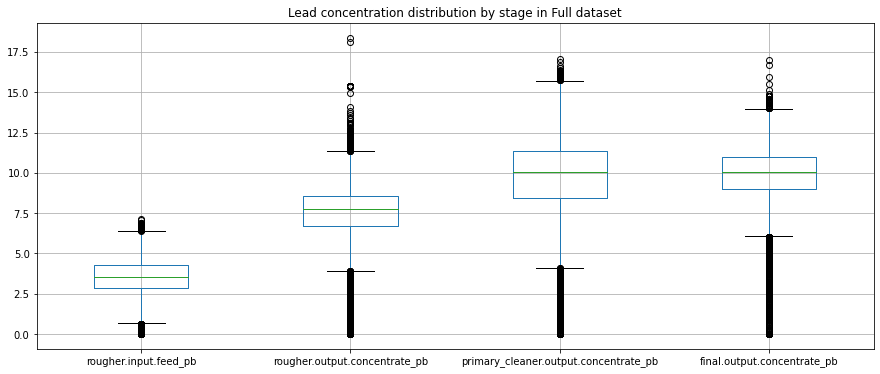

In [50]:
# boxplots of Lead concentration distribution by stage in full dataset:
full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',  
          'final.output.concentrate_pb']].boxplot(figsize=(15, 6))
plt.title("Lead concentration distribution by stage in Full dataset")
plt.show()

We can see almost all materials concentrations contain outliers - but after eliminating the zero gold in feed (a most critical issue for recovery prediction and optimization), we don't find reason to drop or change any other value: the outliers are part of the picture, and should take part in the model development. They seem to be part of the real data. 

We can move now to the total metal concentration (all 3 metals together) in each stage:  

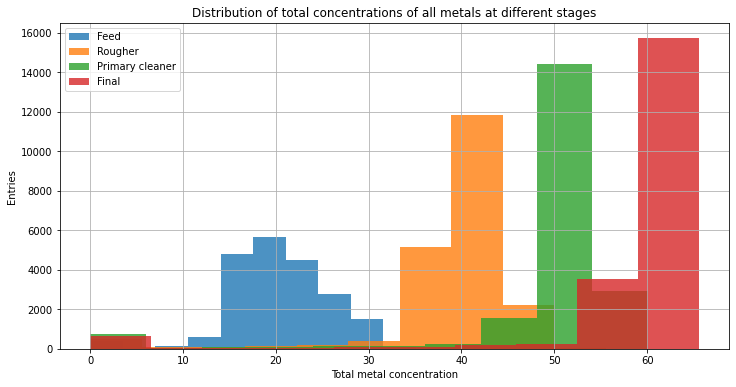

In [51]:
# Histograms of total concentrations of all metals (gold, silver and lead) at different stages: 
plt.figure(figsize=(12, 6))
full['total_feed'] = full['rougher.input.feed_au'] + full['rougher.input.feed_ag'] + full['rougher.input.feed_pb']
'rougher.output.concentrate_sol'
full['total_rougher'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] + full[
    'rougher.output.concentrate_pb']
full['total_primary_cleaner'] = full['primary_cleaner.output.concentrate_au'] + full[
    'primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb']
full['total_final'] = full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] + full[
    'final.output.concentrate_pb']
full['total_feed'].hist(grid=True, alpha = 0.8)
full['total_rougher'].hist(alpha = 0.8)
full['total_primary_cleaner'].hist(alpha = 0.8)
full['total_final'].hist(alpha = 0.8)
plt.title('Distribution of total concentrations of all metals at different stages')
plt.xlabel('Total metal concentration')
plt.ylabel('Entries')
plt.legend(['Feed', 'Rougher', 'Primary cleaner', 'Final'])
plt.show;

Similar to what we saw above, about distributions of some of the separate metals' concentrations in the different stages - we see that also in the total metal concentration (all 3 metals together) - the rise in the values is acompanied with a more and more condence distribution (in the higher tenths of the concentration values range), and a stronger and stronger left-skewed distribution. In the final stage - around 80% of all entries have total metal concentration in the top 10% of the total metal concentration values range (!). 

The few hundred entries that are in the lowest tenth of the range (below ~6.5) in the 2 later stages but not in the earlier stages might look a bit strange - but might be part of the outcomes of the process. Before we can move to building the model, we will check if these include values equal to zero, and deal with it.    

First we will check for cases of value equals zero in the third stage, 'total_primary_cleaner':

In [52]:
full[full['total_primary_cleaner'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_feed,total_rougher,total_primary_cleaner,total_final
19,2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,...,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,15.624642,36.837927,0.0,58.604347
22,2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145,...,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998,14.735893,36.314838,0.0,58.007928
30,2016-01-16 06:00:00,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310,...,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548,14.722220,36.542641,0.0,58.960261
73,2016-01-18 01:00:00,4.677499,11.304745,4.655438,45.135616,72.437752,10.525415,1.479372,19.364956,2.215637,...,10.025142,-499.554142,8.130711,-499.758800,11.951659,-600.726946,16.989526,36.221012,0.0,61.117860
76,2016-01-18 04:00:00,4.821388,10.235502,1.581066,43.264258,84.687443,5.520487,0.821232,9.264695,1.263480,...,10.012719,-501.020322,8.020406,-500.395112,11.995851,-598.774893,17.602028,36.276337,0.0,58.321148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,2018-01-30 21:59:59,5.448963,9.682072,7.106848,46.458319,69.202697,12.375335,3.792151,10.337777,4.540384,...,10.912705,-499.595235,9.039400,-499.913941,11.020934,-499.812405,30.207245,42.444708,0.0,61.589354
17941,2018-01-31 12:59:59,6.137303,10.105221,8.836956,45.294555,72.130539,14.596224,3.702168,9.760608,4.180376,...,10.904775,-500.286259,9.051444,-500.015612,11.001724,-500.484293,30.907383,39.290326,0.0,61.537080
17942,2018-01-31 13:59:59,5.586891,9.860419,9.052075,45.945897,70.022089,14.440506,3.749154,9.475515,4.367870,...,10.891839,-499.773278,9.036959,-499.769619,10.983202,-498.866630,30.476089,9.449729,0.0,61.393207
18002,2018-02-03 01:59:59,6.908167,10.288687,10.131302,43.902258,69.853454,13.838360,3.800475,11.336795,4.606074,...,10.983792,-499.813128,8.977426,-500.019081,10.981565,-501.764257,31.090540,45.523492,0.0,61.099112


The table shows that the zero value in 'total_primary_cleaner' by itself seems like a clear mistake, but can appear when there are reasonable values for 'total_feed', 'total_rougher' and 'total_final', (and the final outputs and other criticla values), so for now we will not drop these rows. This value doesn't by itself impact the recovery calculations. But we must see now wnat about zero values for 'toal_final' - which might be related to abnormal or inf values for recovery as well: 

In [53]:
full[full['total_final'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_feed,total_rougher,total_primary_cleaner,total_final
129,2016-01-20 09:00:00,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,9.991036,-494.993322,7.976046,-500.127874,12.008321,-598.171229,NaN,14.881662,0.000000,0.0
707,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,-0.0,8.894029,0.843584,15.417342,1.779052,...,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808,14.940887,34.882253,41.756149,0.0
814,2016-02-17 22:00:00,0.0,0.0,0.0,0.0,0.0,12.212187,1.547021,NaN,4.255722,...,15.999593,-500.030258,11.954756,-499.464396,26.963449,-500.178711,NaN,45.329712,0.000000,0.0
1317,2016-03-09 21:00:00,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,11.950226,-479.243310,10.024908,-390.210376,16.976682,-458.079018,17.196648,28.834460,0.000000,0.0
1318,2016-03-09 22:00:00,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,12.097078,-448.887768,9.933623,-450.725706,16.992591,-449.329547,9.749370,38.928691,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17794,2018-01-25 09:59:59,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,10.935287,-499.316000,9.000033,-500.059730,11.006083,-499.293387,24.350342,47.329924,0.000000,0.0
17795,2018-01-25 10:59:59,0.0,0.0,0.0,0.0,-0.0,2.444457,0.612787,1.751687,1.210944,...,10.929622,-499.380783,9.016132,-500.127563,10.996343,-500.089294,15.035640,28.172746,12.316876,0.0
17914,2018-01-30 09:59:59,0.0,0.0,0.0,0.0,-0.0,4.404202,0.810326,NaN,1.520501,...,11.068138,-497.745697,9.013462,-499.593422,11.023013,-497.588181,23.610610,34.346644,NaN,0.0
17915,2018-01-30 10:59:59,0.0,0.0,0.0,0.0,-0.0,10.344968,2.570687,NaN,5.237595,...,10.987529,-499.505996,9.029340,-500.081496,10.978063,-500.533248,24.279531,42.425244,NaN,0.0


Here we clearly have a different issue: these rows contain abnormal values (of zero and hence NaN for recovery). We will drop them through the critical column of 'final.output.concentrate_au' in the train set. For the test set (not having this column) we will correct it through the 'final.output.recovery': 

In [54]:
# Keep only entries with any gold in the 'final.output.concentrate_au':
train = train[train['final.output.concentrate_au'] > 0]
test = test[test['final.output.recovery'] > 0]

Now we can move to building the model. Criticla abnormal values were removed from our train and test sets. As a side note -It is worth reporting that 218 cases of some gold in the feed and after rougher stage - ended with no gold and other metals (according to the data) - and this might be worth a check of the data source. 
However, for this project the main goal is developing the model, to which we move now:

## Features selection 

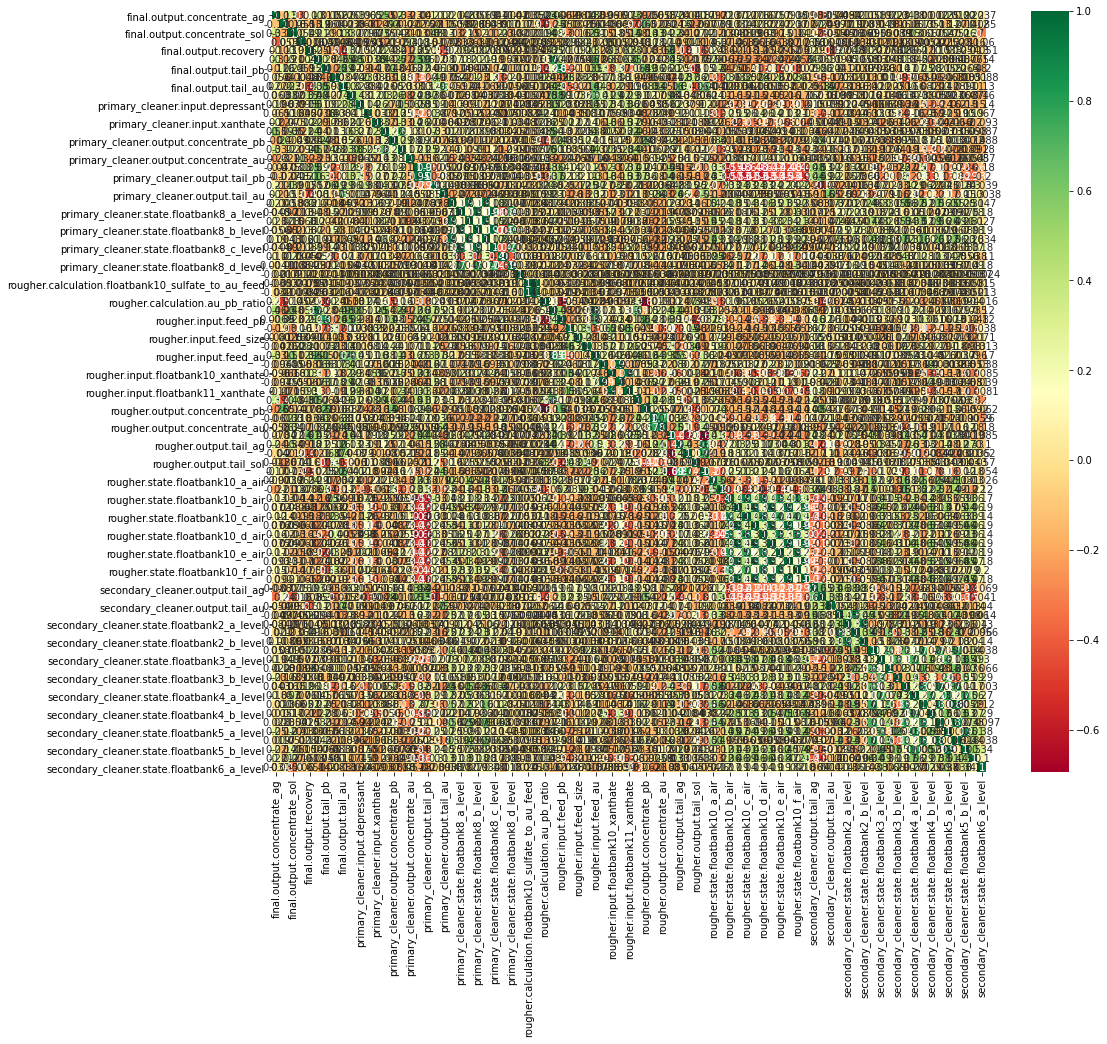

In [55]:
import seaborn as sns 

correlation_matrix = train.corr()
plt.figure(figsize=(16,14))
heat_map = sns.heatmap(train[correlation_matrix.index].corr(), annot=True, cmap="RdYlGn")


In [56]:
#Correlation with target 2
cor = train.corr()
cor_target = abs(cor['final.output.recovery'])
#Selecting correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

final.output.recovery                 1.000000
final.output.tail_au                  0.485484
primary_cleaner.input.sulfate         0.372841
primary_cleaner.output.tail_au        0.432414
rougher.input.feed_ag                 0.351999
rougher.input.feed_au                 0.321181
rougher.input.floatbank10_xanthate    0.302767
rougher.output.concentrate_ag         0.310567
rougher.output.recovery               0.612854
rougher.output.tail_pb                0.406335
rougher.output.tail_au                0.382955
secondary_cleaner.output.tail_au      0.397215
Name: final.output.recovery, dtype: float64

In [57]:
#Correlation with target 1
cor_target = abs(cor['rougher.output.recovery'])
#Selecting correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

final.output.recovery                       0.612854
final.output.tail_ag                        0.451773
primary_cleaner.input.sulfate               0.438989
primary_cleaner.output.tail_ag              0.443584
primary_cleaner.output.tail_pb              0.455440
rougher.input.feed_ag                       0.405268
rougher.input.feed_pb                       0.394219
rougher.input.feed_sol                      0.316081
rougher.input.feed_au                       0.348505
rougher.output.concentrate_ag               0.352594
rougher.output.recovery                     1.000000
rougher.output.tail_ag                      0.424738
rougher.output.tail_pb                      0.626624
rougher.output.tail_au                      0.694190
rougher.state.floatbank10_a_air             0.405031
rougher.state.floatbank10_a_level           0.365594
rougher.state.floatbank10_c_air             0.348242
rougher.state.floatbank10_d_air             0.335390
secondary_cleaner.state.floatbank3_a_air    0.

## Build the model
### Write a function to calculate the final sMAPE value.


In [58]:
# a function for smape and a function for weighted smape according to the metric rules for gold recovery stages: 
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    return (error / scale).mean()

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true.values[:, 0], y_pred[:, 0])
    final = smape(y_true.values[:, 1], y_pred[:, 1])
    
    return 0.25 * rougher + 0.75 * final

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

We will use from the train set only the features that are in the test set - to make the model a practical model for prediction (not using output or calculations that include output). We will also not use the 'date' column, since for future predictions it seems less relevant and might confuse our model. 

In [59]:
train['rougher.output.recovery'].sort_values()

1200       2.520854
15664     22.165416
13121     25.005887
1199      25.554024
13034     27.641909
            ...    
13036    100.000000
13037    100.000000
13038    100.000000
13039    100.000000
13035    100.000000
Name: rougher.output.recovery, Length: 12009, dtype: float64

In [62]:
# Training and evaluating (with final==weighted sMAPE) different regression models, using cross-validation 
    # choosing only input features with higher correlation to any of the 2 targtes: 

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

y = train[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)
X = train[['primary_cleaner.input.sulfate', 'rougher.input.feed_ag', 'rougher.input.feed_au', 
           'rougher.input.floatbank10_xanthate', 'primary_cleaner.input.sulfate', 
           'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.state.floatbank10_a_air', 
           'secondary_cleaner.state.floatbank4_a_air']].reset_index(drop=True)

def cross_validate (X, y, model):
    kfold = KFold(n_splits=10)
    scores = []

    for train_index, valid_index in kfold.split(X):
     
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        model.fit(X_train, y_train)
        pred_valid = model.predict(X_valid)
        
        scores.append(smape_weighted(y_valid, pred_valid))
        
    return np.mean(scores)
        
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), DummyRegressor()] 
for model in models:
    score = cross_validate(X, y, model)
    print(model, 'sMAPE_weighted =', score)

LinearRegression() sMAPE_weighted = 0.07457661638514886
KNeighborsRegressor() sMAPE_weighted = 0.09047142599044163
DecisionTreeRegressor() sMAPE_weighted = 0.10954887876486981
RandomForestRegressor() sMAPE_weighted = 0.07983897920994061
DummyRegressor() sMAPE_weighted = 0.08758151219697737


The model with the lowest sMAPE (0.0746) using cross-validation (with 10 splits) on the training dataset is a LinearRegressor model. RandomForestRegressor gave us the second best result (sMAPE of 0.0798), and the other 2 models had larger errors. Comparison with a simple baseline, predicting always the mean (also using cross-validation) shows that the dummyregressor had an sMAPE (0.0876), larger than our best default-parameters model. 

We will continue now to hyperparameters tuning, using GridSearchCV, for our 2 best-performing (with default parameters) models. The function - for each model - will tune and choose best parameters (metric being sMAPE) based on cross-validation inside the train set (X, y), and then test each of the 2 best options once on the unseen data - the test set.   

In [64]:
# Hyperparameters tuning for our 2 best default-params models: 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

def tune_hyperparameters (model, param_grid, X, y, X_test, y_test):
    score = make_scorer (smape_weighted, greater_is_better=False)
    grid = GridSearchCV(model, param_grid, scoring=score, n_jobs=-1, refit=True, verbose=3)
    grid.fit(X, y)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(model, 'Best Params',grid.best_params_)
    print('sMAPE_weighted =',smape_weighted(y_test,y_pred))
    return best_model  
          
def tune_2_models (models):           
    search_grids = [lnr_grid, rfr_grid]
    for i,model in enumerate(models):
        tune_hyperparameters(model,search_grids[i],X ,y, X_test, y_test)
           
models = [LinearRegression(), RandomForestRegressor()]
lnr_grid = {'fit_intercept':('True', 'False'), 
            'copy_X':('True', 'False')}
              
rfr_grid = {'criterion':('squared_error', 'absolute_error', 'poisson'),
            'n_estimators':[10,40,70,100],
            'max_depth':[5,None],
            'min_samples_split':[2,4],
            'min_samples_leaf':[1,2]}
y_test = test[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)
X_test = test[['primary_cleaner.input.sulfate', 'rougher.input.feed_ag', 'rougher.input.feed_au', 
           'rougher.input.floatbank10_xanthate', 'primary_cleaner.input.sulfate', 
           'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.state.floatbank10_a_air', 
           'secondary_cleaner.state.floatbank4_a_air']].reset_index(drop=True)
tune_2_models (models)    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................copy_X=True, fit_intercept=True; total time=   0.0s
[CV 2/5] END ................copy_X=True, fit_intercept=True; total time=   0.0s
[CV 3/5] END ................copy_X=True, fit_intercept=True; total time=   0.0s
[CV 4/5] END ................copy_X=True, fit_intercept=True; total time=   0.0s
[CV 5/5] END ................copy_X=True, fit_intercept=True; total time=   0.0s
[CV 1/5] END ...............copy_X=True, fit_intercept=False; total time=   0.0s
[CV 2/5] END ...............copy_X=True, fit_intercept=False; total time=   0.0s
[CV 3/5] END ...............copy_X=True, fit_intercept=False; total time=   0.0s
[CV 4/5] END ...............copy_X=True, fit_intercept=False; total time=   0.1s
[CV 5/5] END ...............copy_X=True, fit_intercept=False; total time=   0.0s
[CV 1/5] END ...............copy_X=False, fit_intercept=True; total time=   0.0s
[CV 2/5] END ...............copy_X=False, fit_int

Our best model, when tested on the unseen test set (using our features selection, that was chosen based only on the train set correlations), is **LinearRegression, with the following parameters**: {'copy_X': 'True', 'fit_intercept': 'True'}. It provided sMAPE of 0.0645 on the unseen test dataset. The best **RandomForestRegressor** model performed worse (sMAPE of 0.0749) on the test set. We will now check the constant dummy model on the test set for baseline:    

In [65]:
# Evaluating the dummy model on the test set:
model = DummyRegressor()
model.fit(X, y)
y_pred = model.predict(X_test)
smape_weighted(y_test, y_pred) 

0.0747062754505688

The constant dummy model provided (on the test set) sMAPE of 0.0747, which is 16% higher error than our 0.0645 from our best model, so we approve our model is better than the simple baseline. 

### Conclusion

**Project goal** is achieved: We have prepared a prototype of a machine learning model, a LinearRegressor model, to predict gold recovery, with the lowest weighted sMAPE (0.0645 tested on the test set, compared to 0.0747 of the constant baseline dummy model).

An additional note is that almost 10% of original data entries had zero gold recovery in the feed or in the rougher output concentrate. These entries were dropped from model development, but it might worth to report it to the source of the data.   